# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("telecom_users.csv", index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df = df[~(df.TotalCharges.isna())]

In [5]:
df["Churn"].value_counts(normalize=True)

No     0.734438
Yes    0.265562
Name: Churn, dtype: float64

In [6]:
d = {'No' : 0, 'Yes' : 1}
df["Churn"] = df["Churn"].map(d)
df["Churn"].value_counts(normalize=True)

0    0.734438
1    0.265562
Name: Churn, dtype: float64

In [7]:
df[df['Churn'] == 1].mean()

SeniorCitizen        0.253308
tenure              18.246377
MonthlyCharges      74.164871
TotalCharges      1550.701985
Churn                1.000000
dtype: float64

In [8]:
# df.loc[df["InternetService"].isin(["Fiber optic"]) == False, "InternetService"] = 0
# df.loc[df["InternetService"].isin(["Fiber optic"]) == True, "InternetService"] = 1
# df["InternetService"] = df["InternetService"].astype (int)
df["InternetService"].value_counts()

Fiber optic    2627
DSL            2064
No             1285
Name: InternetService, dtype: int64

In [9]:
df.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [10]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 5976
Процент полностью заполненных объектов из всей выборки: 100.0


In [11]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# 2. Исследование зависимостей и формулирование гипотез

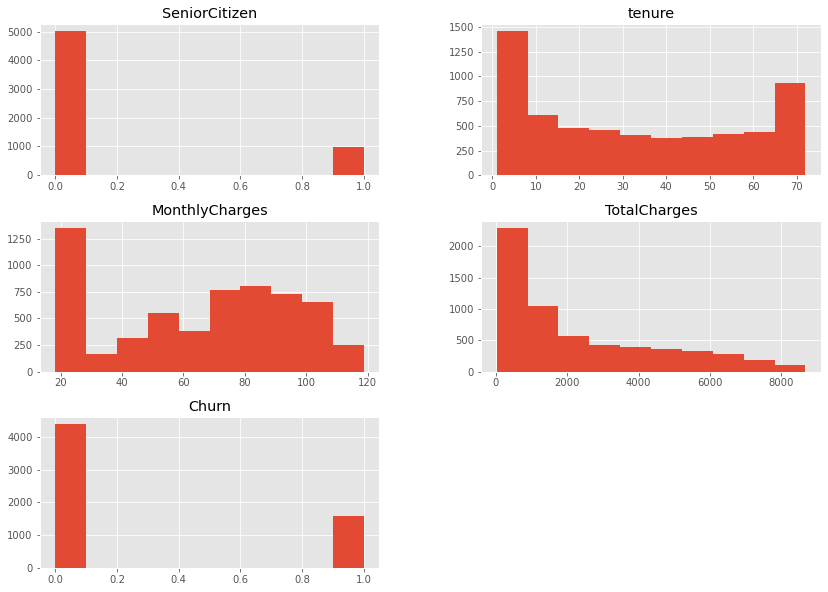

In [12]:
### YOUR CODE HERE ###
df.hist(column=df.columns, figsize=(14, 10))
None

In [13]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.00,0.00,0.22,0.09,0.15
tenure,0.00,1.00,0.26,0.83,-0.35
MonthlyCharges,0.22,0.26,1.00,0.66,0.19
TotalCharges,0.09,0.83,0.66,1.00,-0.20
Churn,0.15,-0.35,0.19,-0.20,1.00


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617,0.265562
std,0.368157,24.500858,30.107576,2274.127165,0.441669
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.750000,404.312500,0.000000
50%,0.000000,29.000000,70.425000,1412.150000,0.000000
75%,0.000000,56.000000,89.900000,3846.962500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


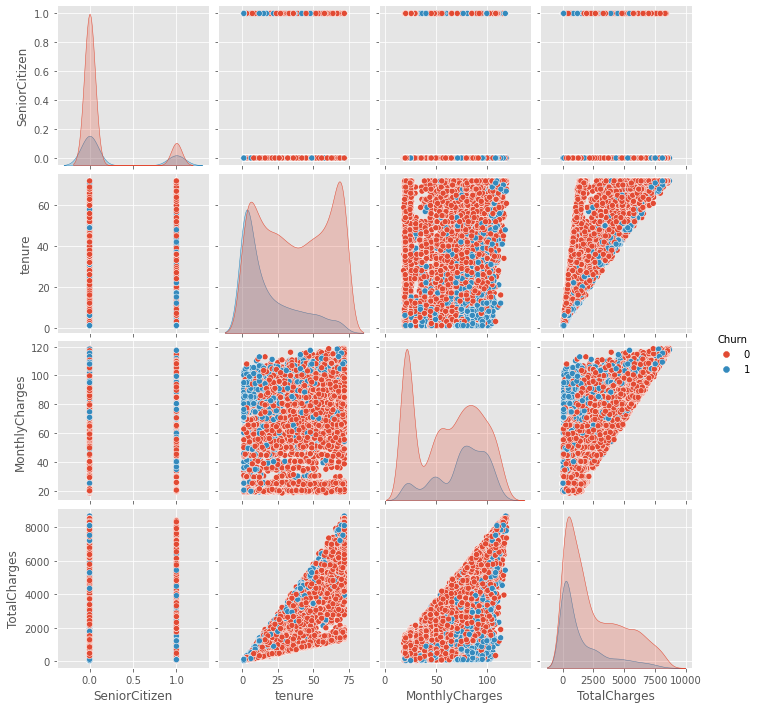

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='Churn')
plt.show()

## Распределение целевого признака в зависимости от пола

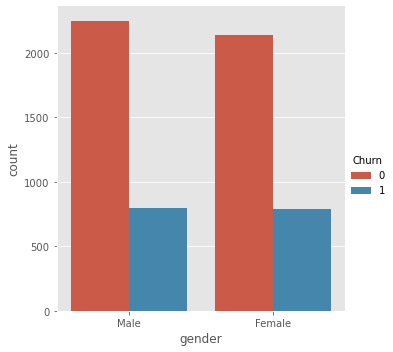

In [16]:
sns.catplot(x="gender",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Пол клиента на отток не влияет. Уберем признак из датасета

## Распределение целевого признака в зависимости от того является ли клиент пенсионером (1, 0)

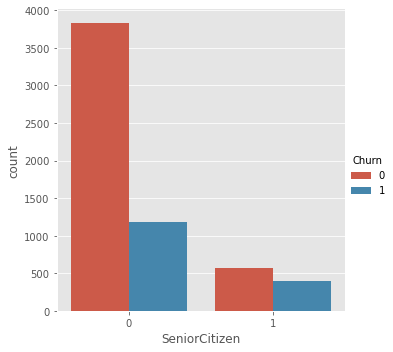

In [17]:
sns.catplot(x="SeniorCitizen",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если клиент является пенсионером вероятность оттока высока

## Распределение целевого признака в зависимости от того состоит ли клиент в браке (Yes, No)

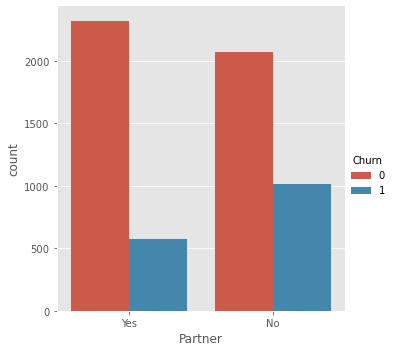

In [18]:
sns.catplot(x="Partner",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если клиент не состоит в браке вероятность оттока выше

## Распределение целевого признака в зависимости от того есть ли у клиента иждивенцы (Yes, No)

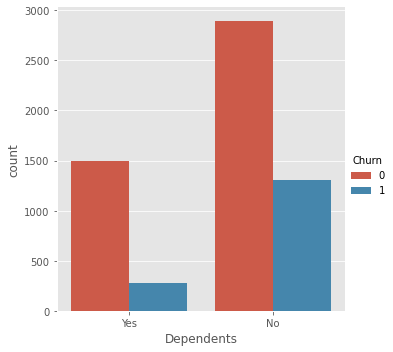

In [19]:
sns.catplot(x="Dependents",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если у клиента есть иждивенцы вероятность отттока выше

## Распределение целевого признака в зависимости от того сколько месяцев человек являлся клиентом компании

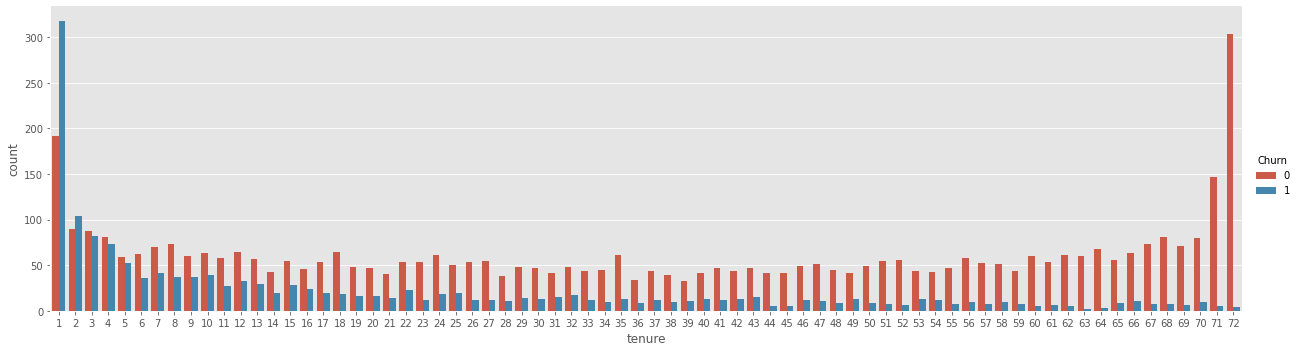

In [20]:
sns.catplot(x='tenure',
            hue='Churn',
            kind='count',
            data=df,
            height= 5, 
            aspect= 3.5);

### Вывод: Наиболее сильный отток в первый месяц, что логично. Если в первый месяц клиента не устаривает сервис, вероятность ухода высока

## Распределение целевого признака в зависимости от того подключена ли услуга телефонной связи (Yes, No)

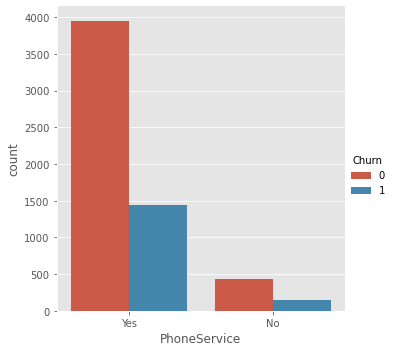

In [21]:
sns.catplot(x='PhoneService',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечатление, что не сильно поможет этот признак. Соотношение ушедших/не ушедших приблизительно одинаково, независимо от того подключен ли телефонный сервис или нет

## Распределение целевого признака в зависимости от того подключены ли несколько телефонных линий (Yes, No, No phone service)

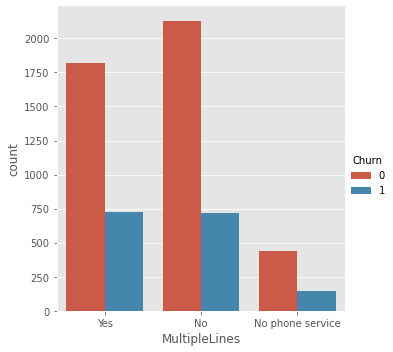

In [22]:
sns.catplot(x='MultipleLines',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечатление, что не сильно поможет этот признак. Соотношение ушедших/не ушедших приблизительно одинаково, независимо от того подключен ли телефонный сервис или нет

## Распределение целевого признака в зависимости от интернет-провайдера клиента (DSL, Fiber optic, No)

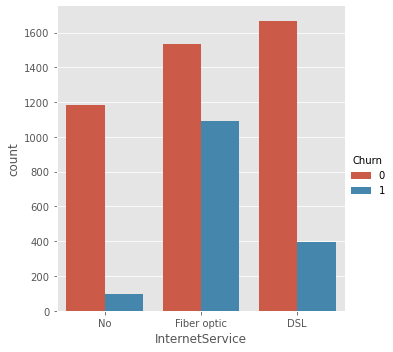

In [23]:
sns.catplot(x='InternetService',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Интересный признак, кто пользуется fiber optic намного чаще перестает пользоваться сервисом. Компании надо обратить внимание и посмотреть что не так с оптикой

## Распределение целевого признака в зависимости от подключена ли услуга онлайн-безопасности (Yes, No, No internet service)

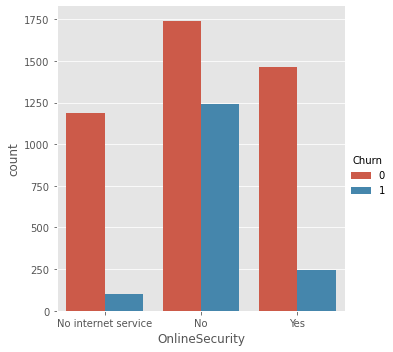

In [24]:
sns.catplot(x='OnlineSecurity',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого не подключена онлайн безопасность намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости от подключена ли услуга online backup (Yes, No, No internet service)

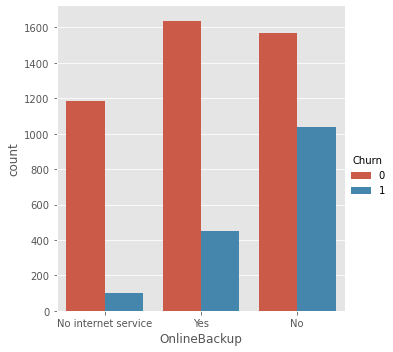

In [25]:
sns.catplot(x='OnlineBackup',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого не подключен онлайн backup намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости есть ли у клиента страховка оборудования (Yes, No, No internet service)

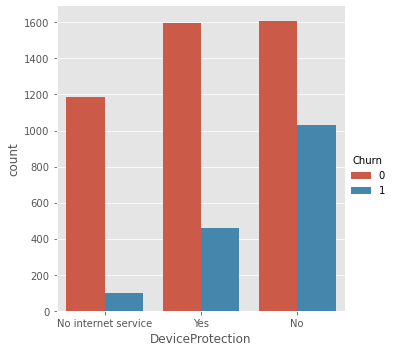

In [26]:
sns.catplot(x='DeviceProtection',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого нет страховки намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости подключена ли услуга технической поддержки (Yes, No, No internet service)

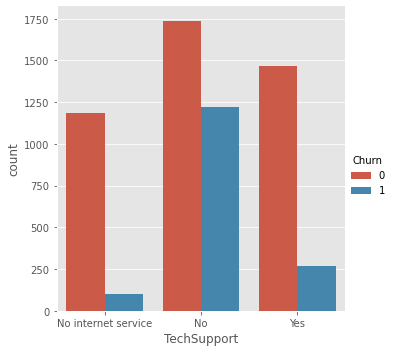

In [27]:
sns.catplot(x='TechSupport',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого нет тех поддержки намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости подключена ли услуга стримингового телевидения (Yes, No, No internet service)

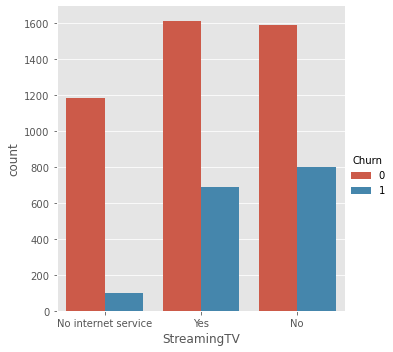

In [28]:
sns.catplot(x='StreamingTV',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечаление, что этот признак нам ничем не поможет

## Распределение целевого признака в зависимости подключена ли услуга подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)

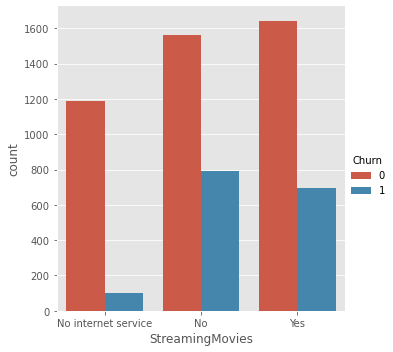

In [29]:
sns.catplot(x='StreamingMovies',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Аналогично вышесказанному

## Распределение целевого признака в зависимости от типа контракта клиента (Month-to-month, One year, Two year)

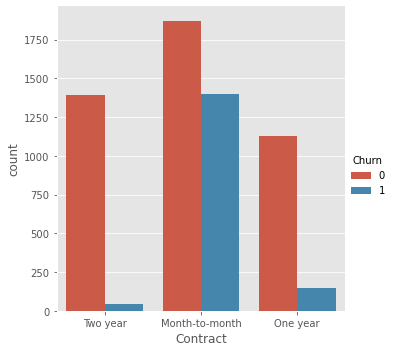

In [30]:
sns.catplot(x='Contract',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого у кого месячный контракт намного чаще перестают пользоваться сервисом, что в принципе логично. Расстаться проще, когда платишь только за месяц

## Распределение целевого признака в зависимости пользуется ли клиент безбумажным биллингом (Yes, No)

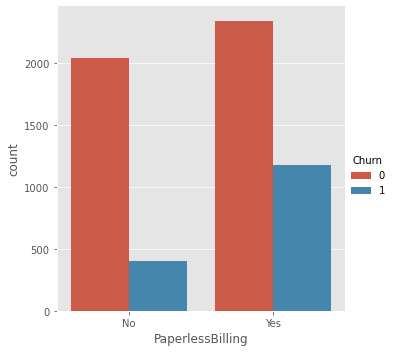

In [31]:
sns.catplot(x='PaperlessBilling',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого бумажные счета покидают компанию чаще. Пока непонятно как этим признаком воспользоваться

## Распределение целевого признака в зависимости от метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

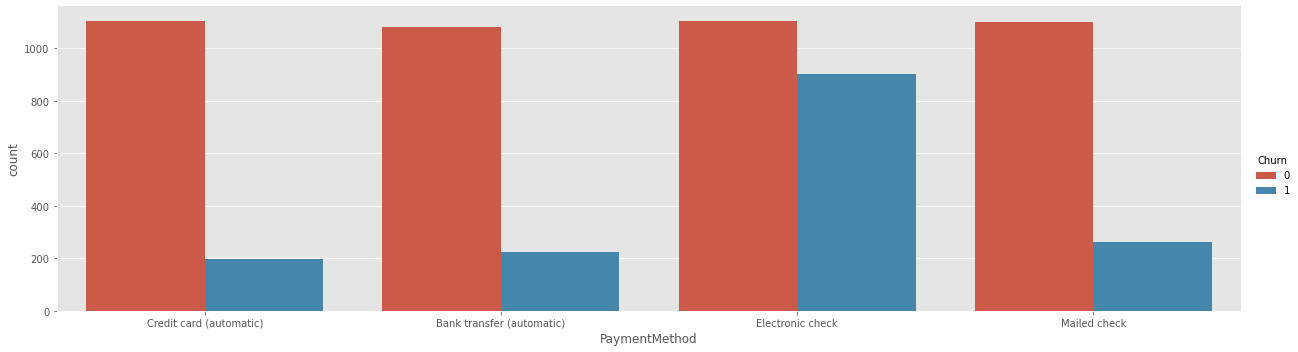

In [32]:
sns.catplot(x='PaymentMethod',
            hue='Churn',
            kind='count',
            data=df,
            height= 5, 
            aspect= 3.5);

### Вывод: У кого электронные чек намного чаще перестают пользоваться сервисом. 

## Общий вывод: Такое впечатление, что предоставляемый компанией базовый пакет неудовлетворительного качества или не соответствует стоимости, что дополнительно подтверждает отток пенсионеров (платить больше не хотят). Так как те, кто подключают доп.опции типа техподдержки, страховка, online backup, security и далее, компанию не покидают. Также компании надо обратить внимание fiber кабель

### Портрет клиента покидающего команию:
1. недавно подключился;
2. не подключает доп.услуги;
3. подключен к сервису через фибер кабель;
4. не имеет партнера, иждивенцев, пенсионер, оплачивает счета электронно

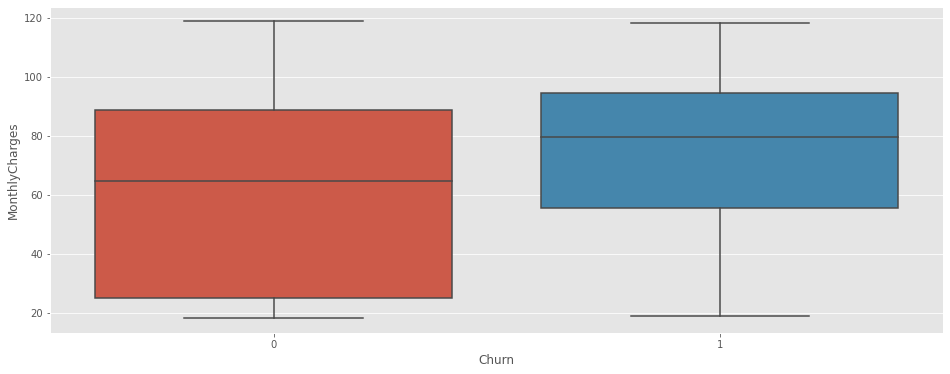

In [33]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(16,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes);

## Интересное наблюдение, те кто уходят, в среднем тратят больше

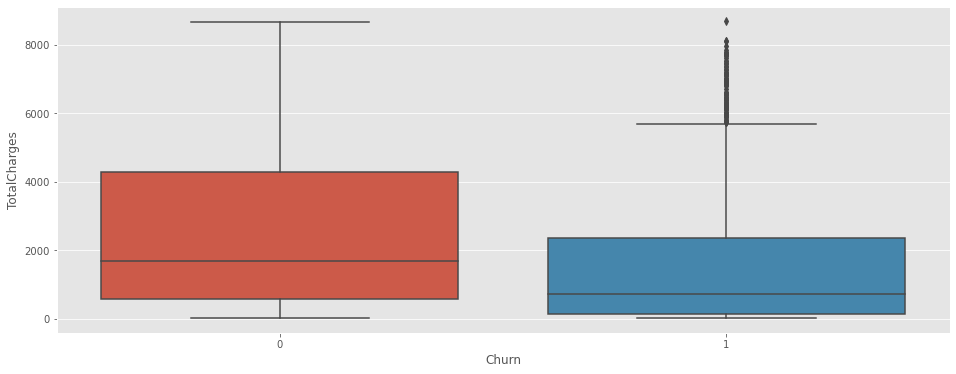

In [34]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(16,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes);

## Разделение выборки на трейн/тест

In [13]:
X = df.drop(["customerID", "Churn", 'gender', 'StreamingTV', 'StreamingMovies',
            'MultipleLines', 'PhoneService'], axis=1)
y = df["Churn"]

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
train_y.value_counts()

0    3511
1    1269
Name: Churn, dtype: int64

## Выбросы

In [37]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries
boundaries = calculate_outliers(train_x.MonthlyCharges)
boundaries

(-46.14999999999999, 171.45)

In [38]:
is_outlier = (train_x.MonthlyCharges < boundaries[0]) | (train_x.MonthlyCharges > boundaries[1]) 
is_outlier.sum()

0

In [39]:
boundaries = calculate_outliers(test_x.MonthlyCharges)
is_outlier = (test_x.MonthlyCharges < boundaries[0]) | (test_x.MonthlyCharges > boundaries[1]) 
is_outlier.sum()

0

In [40]:
boundaries = calculate_outliers(test_x.TotalCharges)
is_outlier = (train_x.TotalCharges < boundaries[0]) | (train_x.TotalCharges > boundaries[1]) 
is_outlier.sum()

0

In [41]:
boundaries = calculate_outliers(test_x.TotalCharges)
is_outlier = (test_x.TotalCharges < boundaries[0]) | (test_x.TotalCharges> boundaries[1]) 
is_outlier.sum()

0

In [42]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 137 to 4637
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     4780 non-null   int64  
 1   Partner           4780 non-null   object 
 2   Dependents        4780 non-null   object 
 3   tenure            4780 non-null   int64  
 4   InternetService   4780 non-null   object 
 5   OnlineSecurity    4780 non-null   object 
 6   OnlineBackup      4780 non-null   object 
 7   DeviceProtection  4780 non-null   object 
 8   TechSupport       4780 non-null   object 
 9   Contract          4780 non-null   object 
 10  PaperlessBilling  4780 non-null   object 
 11  PaymentMethod     4780 non-null   object 
 12  MonthlyCharges    4780 non-null   float64
 13  TotalCharges      4780 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 560.2+ KB


In [15]:
num_cols = [
      "TotalCharges",
    "tenure"

]

cat_cols = [
     "Contract",
    "InternetService"
]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_mm = scaler.fit_transform(train_x[num_cols])
X_train_mm = pd.DataFrame(data = x_train_mm,  
               columns =['TotalCharges_std', "tenure_std"])
x_test_mm = scaler.transform(test_x[num_cols])
X_test_mm = pd.DataFrame(data = x_test_mm,  
                   columns =['TotalCharges_std', "tenure_std"])
              
train_x = pd.concat([X_train_mm, train_x.reset_index(drop=True)], axis=1)
test_x = pd.concat([X_test_mm, test_x.reset_index(drop=True)], axis=1)
columns_for_drop = ['TotalCharges','SeniorCitizen', "tenure", "MonthlyCharges"]
train_x = train_x.drop(columns=columns_for_drop) 
test_x = test_x.drop(columns=columns_for_drop) 

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft = ohe.fit_transform(train_x[cat_cols])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
train_x = pd.concat([df_ft, train_x], axis=1)
ft1 = ohe.transform(test_x[cat_cols])
df_ft1 = pd.DataFrame(ft1, columns=ohe.get_feature_names_out())
test_x = pd.concat([df_ft1, test_x], axis=1)
columns_for_drop = ["Dependents", "Partner",
   "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]
train_x = train_x.drop(columns=columns_for_drop) 
test_x = test_x.drop(columns=columns_for_drop) 
train_x

,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,TotalCharges_std,tenure_std
0,0.0,1.0,0.0,1.0,-0.444767,1.291999
1,1.0,0.0,0.0,0.0,0.095927,0.147334
2,0.0,0.0,1.0,0.0,0.101375,-0.261475
3,0.0,0.0,1.0,0.0,1.136409,0.678786
4,0.0,0.0,1.0,0.0,-0.878222,-1.160855
...,...,...,...,...,...,...
4775,1.0,0.0,0.0,1.0,-0.803828,-0.424999
4776,0.0,0.0,1.0,0.0,0.149458,-0.016190
4777,0.0,0.0,0.0,1.0,-0.714217,0.024691
4778,1.0,0.0,1.0,0.0,-0.151065,-0.384118


# 3. Построение моделей для прогнозирования оттока

AUC_train: 0.832 AUC_test: 0.832


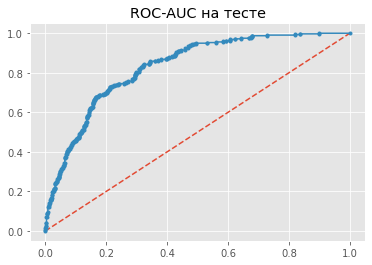

In [46]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
probs_train = logreg.predict_proba(train_x)[:, 1]
probs_test = logreg.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [47]:
f1 = make_scorer(roc_auc_score)
from sklearn.linear_model import LogisticRegressionCV
lr_cv1 = LogisticRegressionCV(Cs=[0.01,0.1,1,5,10,50,100],random_state=0, solver='liblinear',multi_class='ovr',penalty='l1',max_iter=100,cv=3,scoring=f1,class_weight='balanced').fit(train_x, train_y)
probs1 = lr_cv1.predict_proba(train_x)[:, 1]
probs2 = lr_cv1.predict_proba(test_x)[:, 1]
auc1 = roc_auc_score(train_y, probs1)
auc2 = roc_auc_score(test_y, probs2)
print("AUC_train: %.3f" % auc1, "AUC_test: %.3f" % auc2)

AUC_train: 0.833 AUC_test: 0.831


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = "roc_auc")
best_model = clf.fit(train_x, train_y) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'C': 232.99518105153672, 'penalty': 'l2'}
0.8313802816005559
LogisticRegression(C=232.99518105153672, random_state=42)


AUC_train: 0.833 AUC_test: 0.832


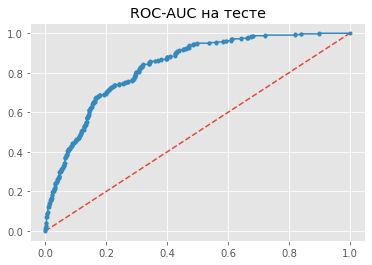

In [49]:
logreg = LogisticRegression(C=232.99518105153672, penalty ='l2', random_state=42)
logreg.fit(train_x, train_y)
probs_train = logreg.predict_proba(train_x)[:, 1]
probs_test = logreg.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [50]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['l2', 'none']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 3, verbose = 0, n_jobs = -1, scoring="roc_auc")
best_model = clf.fit(train_x, train_y) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'penalty': 'none', 'solver': 'saga'}
0.8306372673992032
LogisticRegression(penalty='none', random_state=42, solver='saga')


AUC_train: 0.845 AUC_test: 0.825


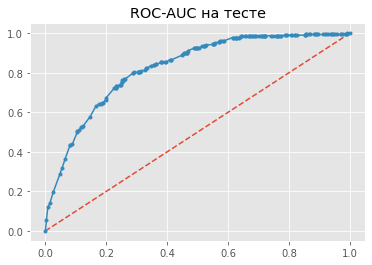

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
qwe = ada.fit(train_x, train_y)
probs_train = qwe.predict_proba(train_x)[:, 1]
probs_test = qwe.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

AUC_train: 0.850 AUC_test: 0.831


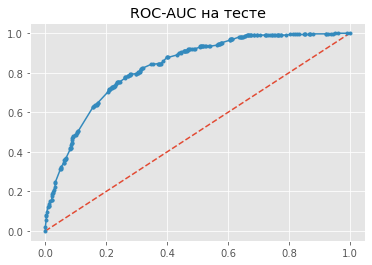

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbdt.fit(train_x, train_y)
probs_train = gbdt.predict_proba(train_x)[:, 1]
probs_test = gbdt.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

AUC_train: 0.803 AUC_test: 0.794


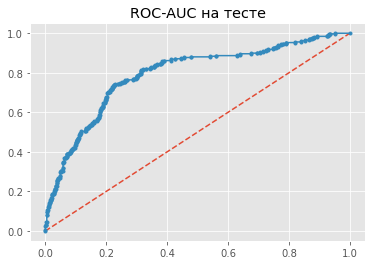

In [53]:
svmodel = SVC(kernel="linear", probability=True)
svmodel.fit(train_x, train_y)
probs_train = svmodel.predict_proba(train_x)[:, 1]
probs_test = svmodel.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

AUC_train: 0.777 AUC_test: 0.759


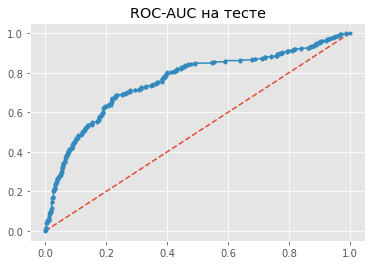

In [54]:
svmodel = SVC(kernel="rbf", probability=True)
svmodel.fit(train_x, train_y)
probs_train = svmodel.predict_proba(train_x)[:, 1]
probs_test = svmodel.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

AUC_train: 0.804 AUC_test: 0.796


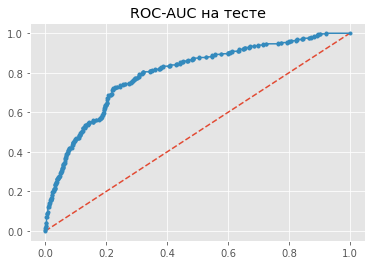

In [55]:
svmodel = SVC(kernel="poly", probability=True)
svmodel.fit(train_x, train_y)
probs_train = svmodel.predict_proba(train_x)[:, 1]
probs_test = svmodel.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

AUC_train: 0.600 AUC_test: 0.630


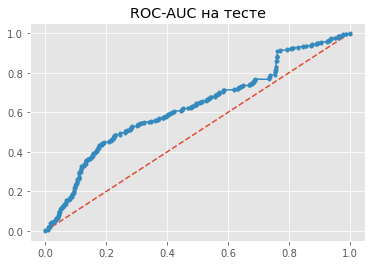

In [56]:
svmodel = SVC(kernel="sigmoid", probability=True)
svmodel.fit(train_x, train_y)
probs_train = svmodel.predict_proba(train_x)[:, 1]
probs_test = svmodel.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21, 23, 25, 27, 29, 31, 33, 35, 40], 
    "metric": ['manhattan', 'euclidean'],
    "weights": ['uniform', 'distance']
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring="roc_auc", n_jobs=-1)
clf_grid.fit(train_x, train_y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)
print(clf_grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}
0.8286595188697028
KNeighborsClassifier(metric='manhattan', n_neighbors=27)


AUC_train: 0.841 AUC_test: 0.835


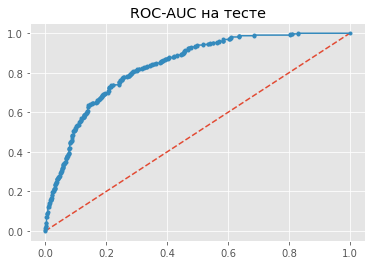

In [58]:
mlp = MLPClassifier(random_state=42).fit(train_x, train_y)
probs_train = mlp.predict_proba(train_x)[:, 1]
probs_test = mlp.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

Text(0, 0.5, 'ROC-AUC')

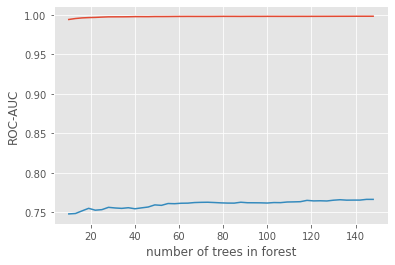

In [59]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 150, 3):
    rf = RandomForestClassifier(n_estimators = n, class_weight = "balanced", random_state=17, oob_score = True)
    rf.fit(train_x, train_y)
    pred_train = rf.predict_proba(train_x)[:, 1]
    pred_rf = rf.predict_proba(test_x)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y,  pred_train))
    f_test.append(roc_auc_score(test_y,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

In [60]:
f_imp_list1 = list(zip(N, f_test))
f_imp_list1.sort(key = lambda x: x[1], reverse=True)
f_imp_list1[:15]

[(145, 0.766504061546396),
 (148, 0.7664986891305282),
 (133, 0.7660348705605937),
 (139, 0.7655943324594203),
 (142, 0.7655889600435523),
 (136, 0.7655137462214009),
 (130, 0.7654546496468533),
 (118, 0.7652325897909773),
 (124, 0.7647293735046776),
 (121, 0.7645664102233493),
 (127, 0.7644714975430151),
 (115, 0.7635671408719074),
 (112, 0.7633307545737167),
 (109, 0.7631642096818098),
 (88, 0.7628794716408075)]

In [61]:
parameters = {'max_depth' : np.arange(2, 100, 4),
          'max_features' : ['sqrt', 'log2', "auto"],
          'min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
          'min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
          }
xlf = RandomForestClassifier(n_estimators=145, class_weight = "balanced", random_state=17, oob_score = True)
cv = RandomizedSearchCV(estimator = xlf, param_distributions=parameters, scoring = "roc_auc", n_iter = 80, cv=3, n_jobs = -1)
cv.fit(train_x, train_y)   
print(cv.best_params_)
print(cv.best_score_)

{'min_samples_split': 23, 'min_samples_leaf': 39, 'max_features': 'auto', 'max_depth': 6}
0.8313004420871248


AUC_train: 0.848 AUC_test: 0.833


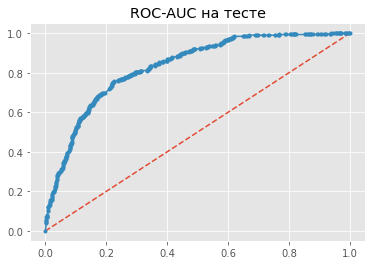

In [62]:
best_rf = RandomForestClassifier(n_estimators = 145, min_samples_split=23, min_samples_leaf=39, 
                              max_features = 'auto', max_depth = 6, class_weight = "balanced",
                             random_state=17, oob_score = True).fit(train_x, train_y)
probs_train = best_rf.predict_proba(train_x)[:, 1]
probs_test = best_rf.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

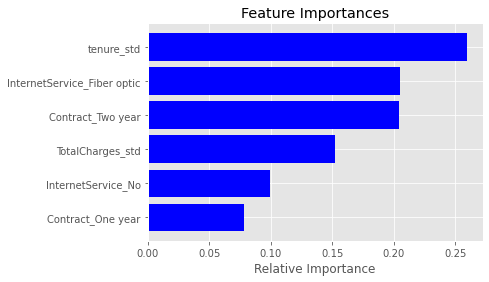

In [63]:
features = train_x.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AUC_train: 0.953 AUC_test: 0.800


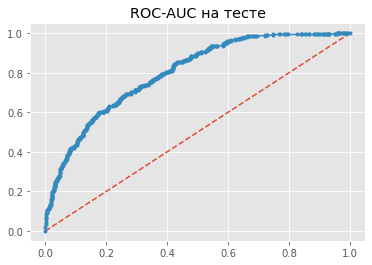

In [64]:
xgb = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x,train_y) 
probs_train = xgb.predict_proba(train_x)[:, 1]
probs_test = xgb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [65]:
f_imp_list = list(zip(train_x.columns, xgb.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list[:6]

[('Contract_Two year', 0.550337),
 ('Contract_One year', 0.23192288),
 ('InternetService_Fiber optic', 0.13073532),
 ('InternetService_No', 0.04609264),
 ('tenure_std', 0.025486525),
 ('TotalCharges_std', 0.015425697)]

In [66]:
parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [1, 5, 15, 200],
              'subsample': [0.6, 0.8, 0.95],
              'colsample_bytree': [0.5, 0.7, 0.9], 
}
xlf = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x,train_y)          
cv = RandomizedSearchCV(estimator = xlf, scoring = "roc_auc", param_distributions=parameters, n_iter = 80, cv=3, n_jobs = -1)
cv.fit(train_x,train_y)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
0.8305808930529067


AUC_train: 0.887 AUC_test: 0.827


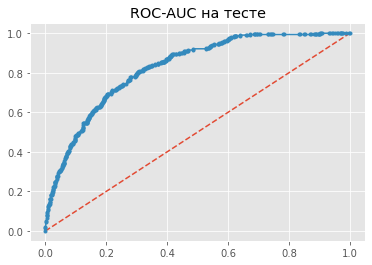

In [67]:
clf_cb = cb.CatBoostClassifier(eval_metric="AUC", logging_level = "Silent"
                              ).fit(train_x,train_y)  
probs_train = clf_cb.predict_proba(train_x)[:, 1]
probs_test = clf_cb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [68]:
f_imp_list = list(zip(train_x.columns, clf_cb.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list

[('tenure_std', 28.562149745998635),
 ('TotalCharges_std', 27.98257652743142),
 ('InternetService_Fiber optic', 14.659339431184613),
 ('Contract_Two year', 13.932330295922037),
 ('InternetService_No', 7.548630888725235),
 ('Contract_One year', 7.314973110738062)]

Text(0, 0.5, 'ROC-AUC')

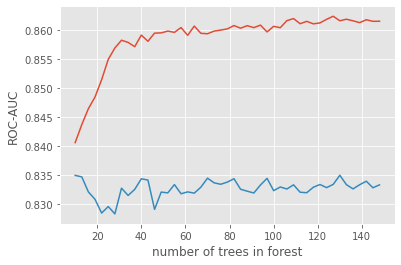

In [69]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 150, 3):
    rf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = n, random_state=17) 
    rf.fit(train_x, train_y)
    pred_train = rf.predict_proba(train_x)[:, 1]
    pred_rf = rf.predict_proba(test_x)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y,  pred_train))
    f_test.append(roc_auc_score(test_y,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

In [70]:
f_imp_list3 = list(zip(N, f_test))
f_imp_list3.sort(key = lambda x: x[1], reverse=True)
f_imp_list3[:15]

[(130, 0.8350005730576926),
 (10, 0.8349772925889315),
 (13, 0.8347158350166903),
 (70, 0.8344991475766823),
 (97, 0.8344651222761852),
 (82, 0.8344006532857695),
 (40, 0.8343881176487442),
 (43, 0.8341750118193149),
 (142, 0.8339690692110427),
 (79, 0.8338168507614505),
 (73, 0.8336914943911978),
 (76, 0.8334461540665606),
 (127, 0.8334228735977994),
 (121, 0.8334013839343275),
 (55, 0.8333924299078809)]

In [71]:
parameters = {'depth': [1, 4, 7, 10, 15, 20],
              'learning_rate': [0.03, 0.1, 0.15, 0.3, 0.9],
              'l2_leaf_reg': [1, 3, 5, 7, 9],
              "subsample": [0.3, 0.5, 0.7, 1],
              "random_strength": [1, 2, 5, 10, 20, 50, 100],
              "min_data_in_leaf": [5, 10, 20, 30, 40, 50, 70, 100, 150]}

cb = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 130)
cv = RandomizedSearchCV(estimator = cb, param_distributions=parameters, scoring="roc_auc", n_iter = 70, cv=3, n_jobs = -1)
cv.fit(train_x,train_y)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.7, 'random_strength': 10, 'min_data_in_leaf': 150, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 4}
0.8341238593970596


AUC_train: 0.855 AUC_test: 0.834


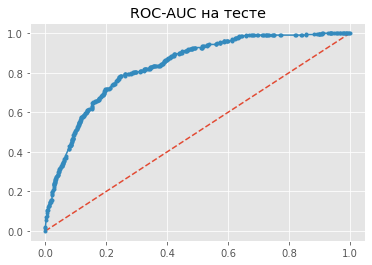

In [18]:
cat_class_1 = cb.CatBoostClassifier(subsample = 0.7, random_strength = 10, min_data_in_leaf = 150,
                                    logging_level='Silent', depth= 7, l2_leaf_reg = 1, n_estimators = 130, learning_rate = 0.1)
cat_class_1.fit(train_x, train_y)
probs_train = cat_class_1.predict_proba(train_x)[:, 1]
probs_test = cat_class_1.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [19]:
f_imp_list = list(zip(train_x.columns, cat_class_1.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list

[('tenure_std', 21.76471355525098),
 ('InternetService_Fiber optic', 21.180901229704876),
 ('TotalCharges_std', 18.556322593239123),
 ('Contract_Two year', 16.85008212502173),
 ('InternetService_No', 12.219548761978508),
 ('Contract_One year', 9.428431734804787)]